## Analyze results of three regression models applied in predicting ads effectiveness 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import xticks,yticks,np

### part1、Analyze the result of SVM_Regression

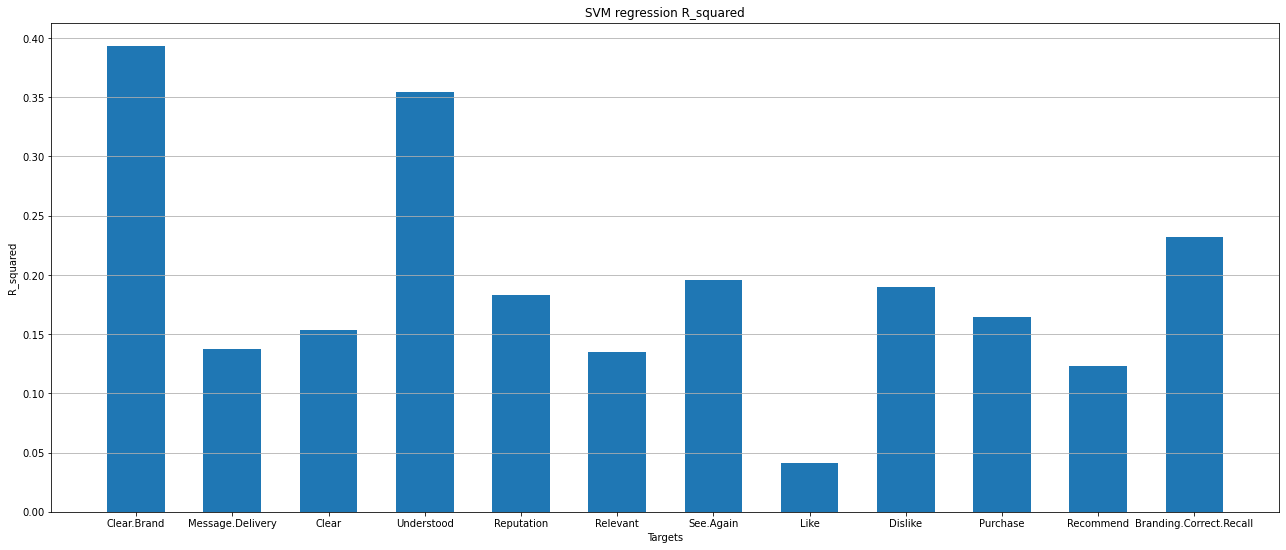

In [7]:
df = pd.read_csv("./result/SVM_regression.csv")

x = np.array(list(df["Unnamed: 0"]))
y = np.array(list(df["R_squared"]))
plt.subplots(figsize=(22,9))
plt.title("SVM regression R_squared")
plt.xlabel("Targets")
plt.ylabel("R_squared")
plt.grid(axis='y')
plt.bar(x,y,width=0.6)
# plt.savefig("./plots/statistic_gategory.png")
plt.show()

### part2、Analyze the result of DT_Regression

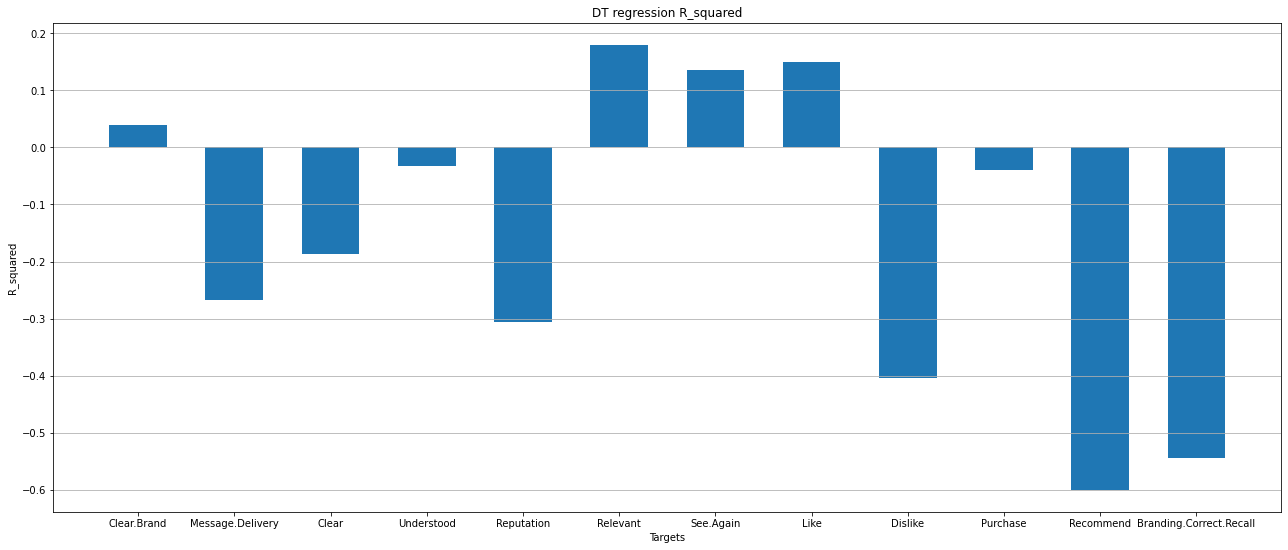

In [8]:
df = pd.read_csv("./result/DT_regression.csv")

x = np.array(list(df["Unnamed: 0"]))
y = np.array(list(df["R_squared"]))
plt.subplots(figsize=(22,9))
plt.title("DT regression R_squared")
plt.xlabel("Targets")
plt.ylabel("R_squared")
plt.grid(axis='y')
plt.bar(x,y,width=0.6)
# plt.savefig("./plots/statistic_gategory.png")
plt.show()

### part3、Analyze the result of RF_Regression

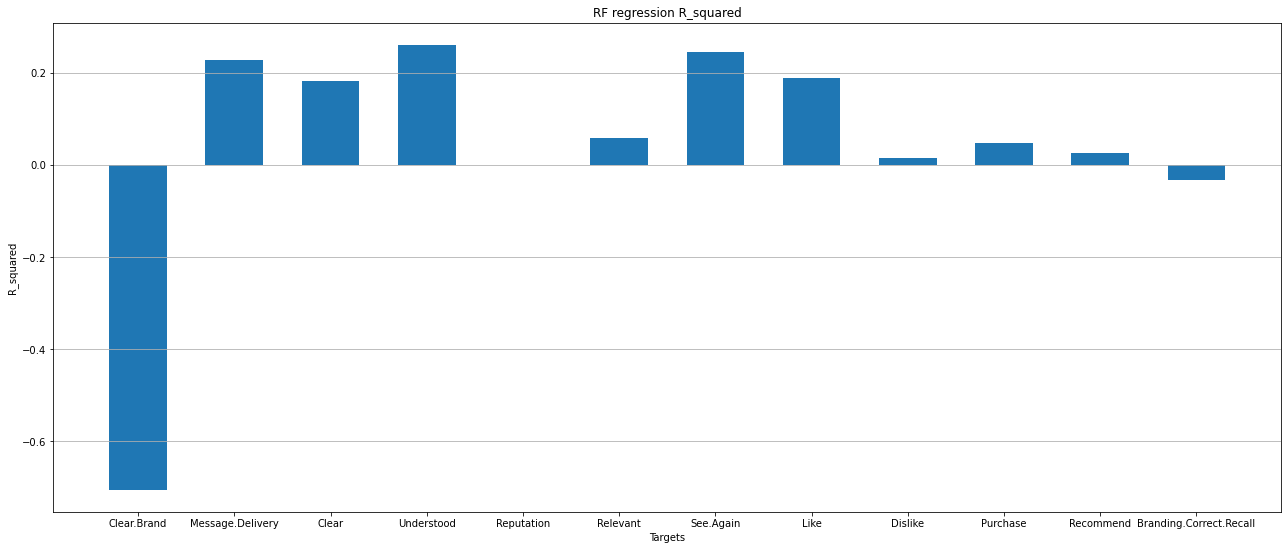

In [31]:
df = pd.read_csv("./result/RF_regression.csv")

x = np.array(list(df["Unnamed: 0"]))
y = np.array(list(df["R_squared_oob"]))
plt.subplots(figsize=(22,9))
plt.title("RF regression R_squared")
plt.xlabel("Targets")
plt.ylabel("R_squared")
plt.grid(axis='y')
plt.bar(x,y,width=0.6)
# plt.savefig("./plots/statistic_gategory.png")
plt.show()

### part4、Analyze the result of SVM_Classification

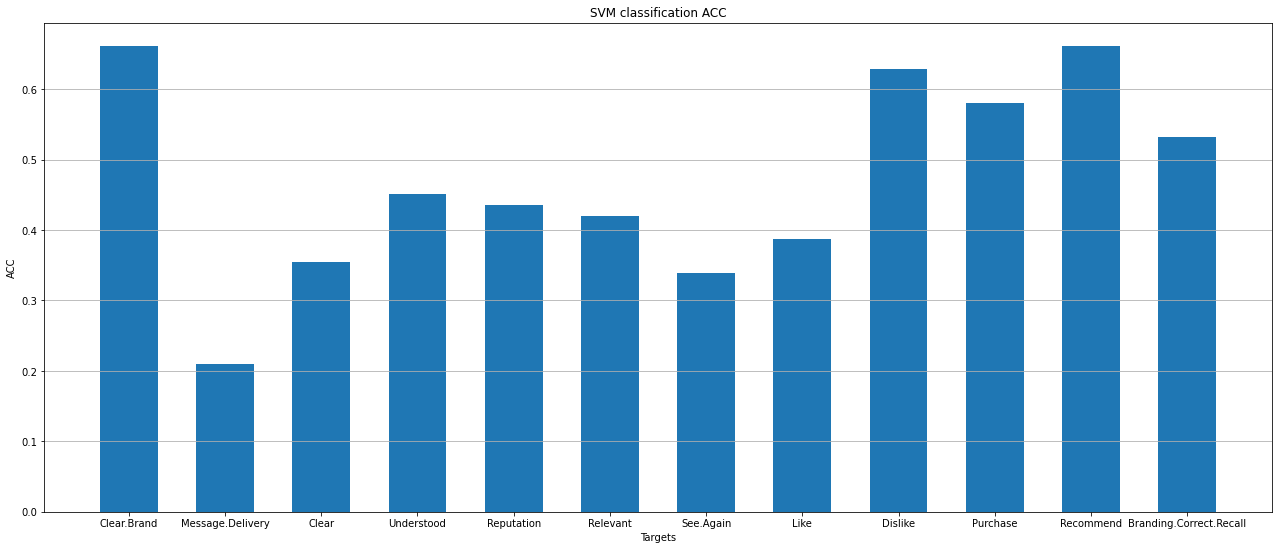

In [24]:
df = pd.read_csv("./result/SVM_classification.csv")

x = np.array(list(df["Unnamed: 0"]))
y = np.array(list(df["ACC"]))
plt.subplots(figsize=(22,9))
plt.title("SVM classification ACC")
plt.xlabel("Targets")
plt.ylabel("ACC")
plt.grid(axis='y')
plt.bar(x,y,width=0.6)
# plt.savefig("./plots/statistic_gategory.png")
plt.show()

### part5、Analyze the result of DT_Classification

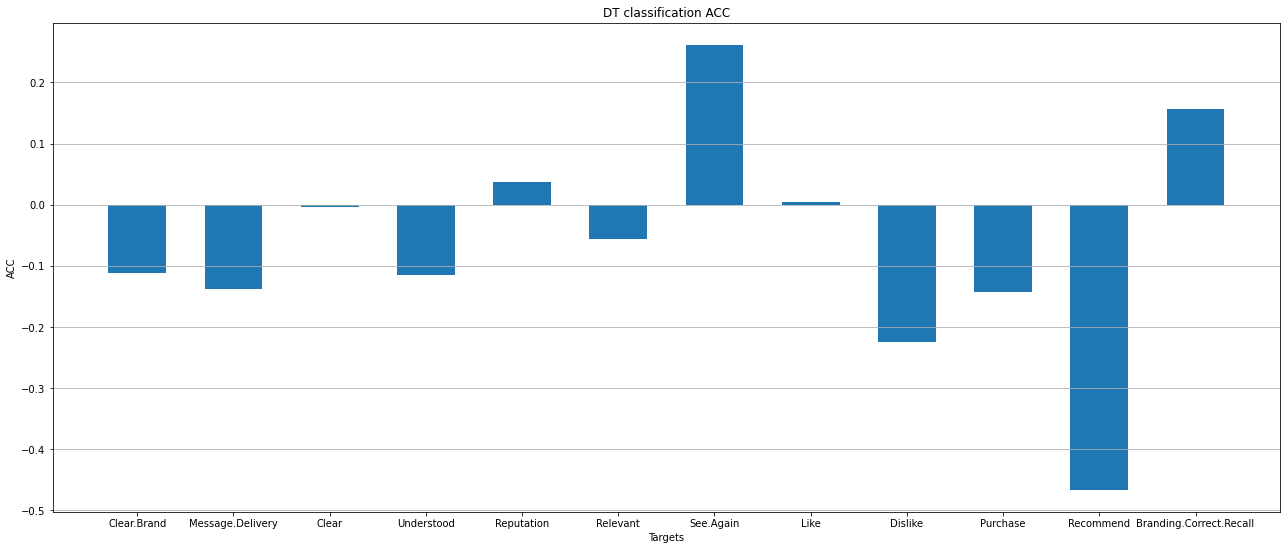

In [5]:
df = pd.read_csv("./result/DT_classification.csv")

x = np.array(list(df["Unnamed: 0"]))
y = np.array(list(df["ACC"]))
plt.subplots(figsize=(22,9))
plt.title("DT classification ACC")
plt.xlabel("Targets")
plt.ylabel("ACC")
plt.grid(axis='y')
plt.bar(x,y,width=0.6)
# plt.savefig("./plots/statistic_gategory.png")
plt.show()

### part6、Analyze the result of RF_Classification

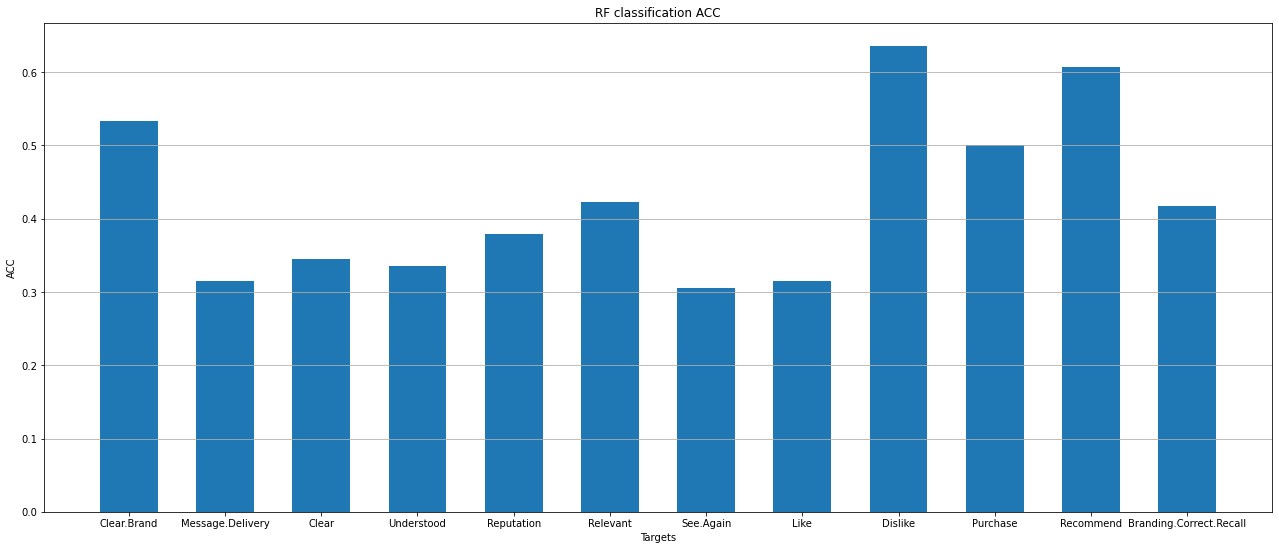

In [4]:
df = pd.read_csv("./result/RF_classification.csv")

x = np.array(list(df["Unnamed: 0"]))
y = np.array(list(df["ACC"]))
plt.subplots(figsize=(22,9))
plt.title("RF classification ACC")
plt.xlabel("Targets")
plt.ylabel("ACC")
plt.grid(axis='y')
plt.bar(x,y,width=0.6)
# plt.savefig("./plots/statistic_gategory.png")
plt.show()

### part7、R_squares of 3 regression models

In [33]:
SVM_df = pd.read_csv("./result/SVM_regression.csv")
DT_df = pd.read_csv("./result/DT_regression.csv")
RF_df = pd.read_csv("./result/RF_regression.csv")
labels = np.array(list(SVM_df["Unnamed: 0"]))
x = np.array(range(12))

y_SVM = np.array(list(SVM_df["R_squared"]))
y_DT = np.array(list(DT_df["R_squared"]))
y_RF = np.array(list(RF_df["R_squared_oob"]))

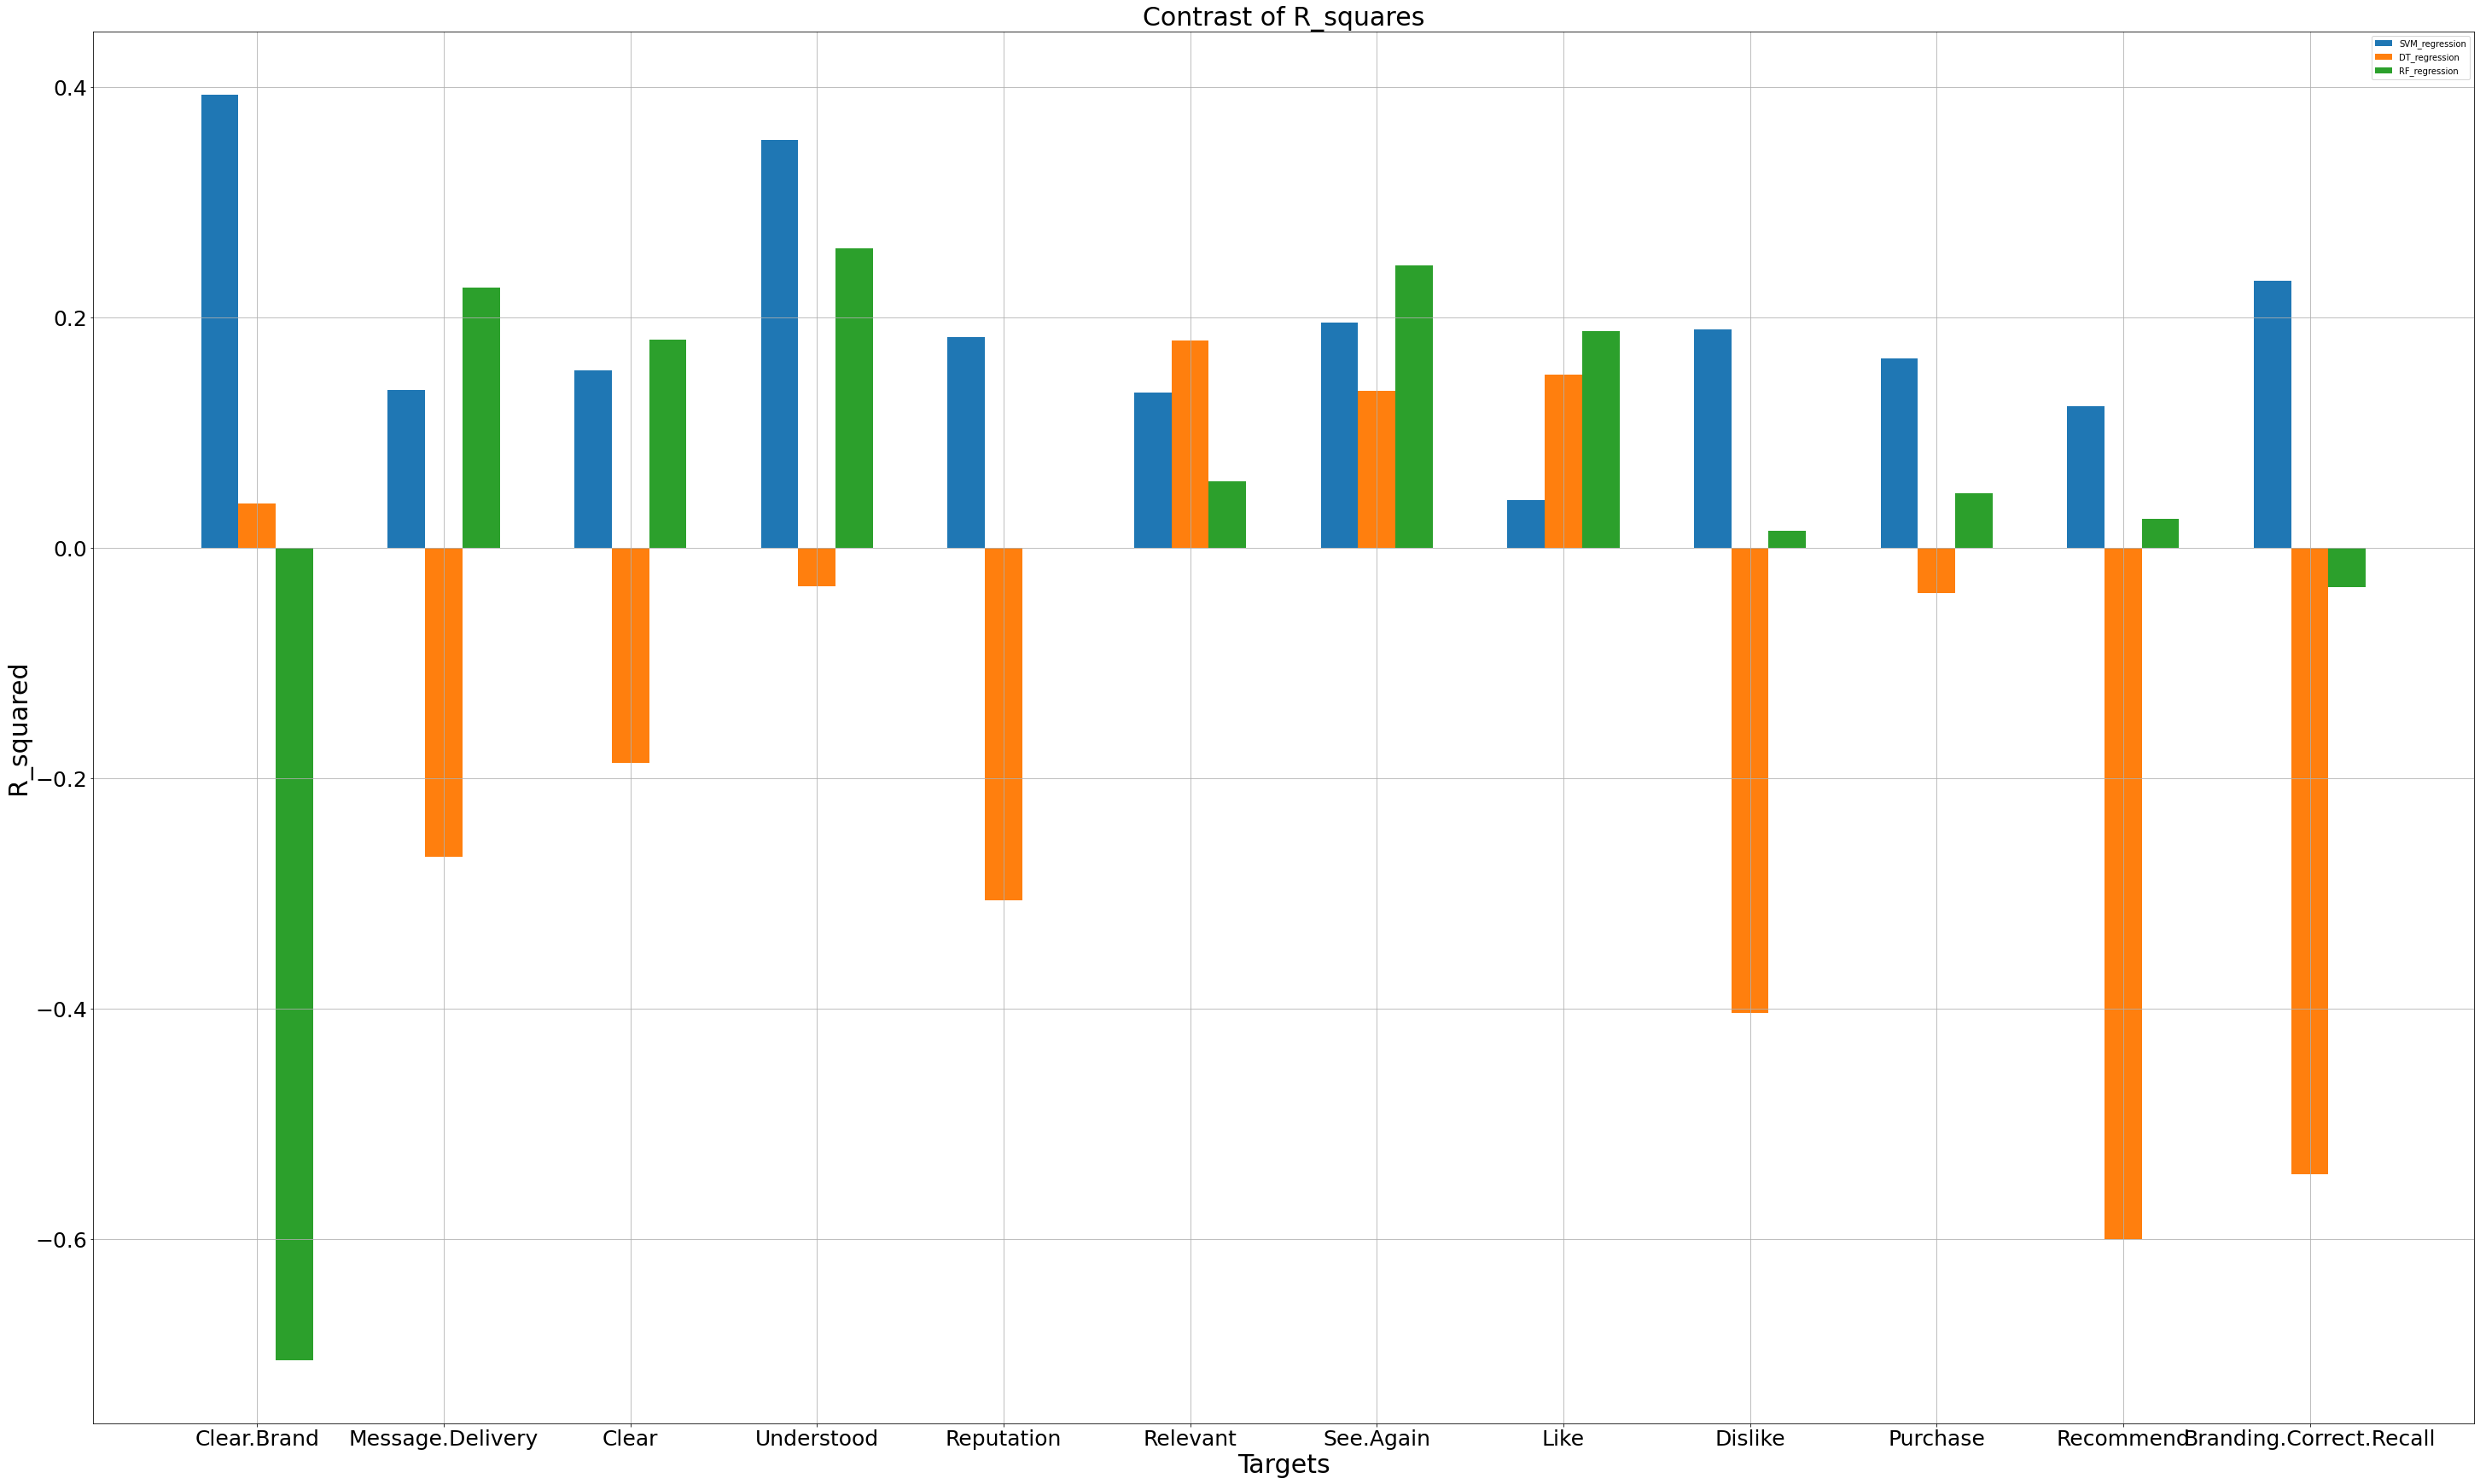

In [35]:
fig = plt.figure(figsize=(50, 30))
plt.bar(x-0.2, y_SVM, label="SVM_regression", width=0.2)
plt.bar(x, y_DT, label="DT_regression", width=0.2)
plt.bar(x+0.2, y_RF, label="RF_regression", width=0.2)

plt.title("Contrast of R_squares", fontproperties={"size":30})
plt.xlabel("Targets", fontproperties={"size":30})
plt.ylabel("R_squared", fontproperties={"size":30})
plt.xticks(fontsize=25, ticks=x, labels=labels)  # 设置x轴刻度字体大小
plt.yticks(fontsize=25)  # 设置y轴刻度字体大小
plt.grid()
plt.legend()
plt.savefig('./plots/R_squared_contrast.png')
plt.show()

### part8、ACC of 3 Classification models

In [36]:
SVM_df = pd.read_csv("./result/SVM_classification.csv")
DT_df = pd.read_csv("./result/DT_classification.csv")
RF_df = pd.read_csv("./result/RF_classification.csv")
labels = np.array(list(SVM_df["Unnamed: 0"]))
x = np.array(range(12))

y_SVM = np.array(list(SVM_df["ACC"]))
y_DT = np.array(list(DT_df["ACC"]))
y_RF = np.array(list(RF_df["ACC"]))

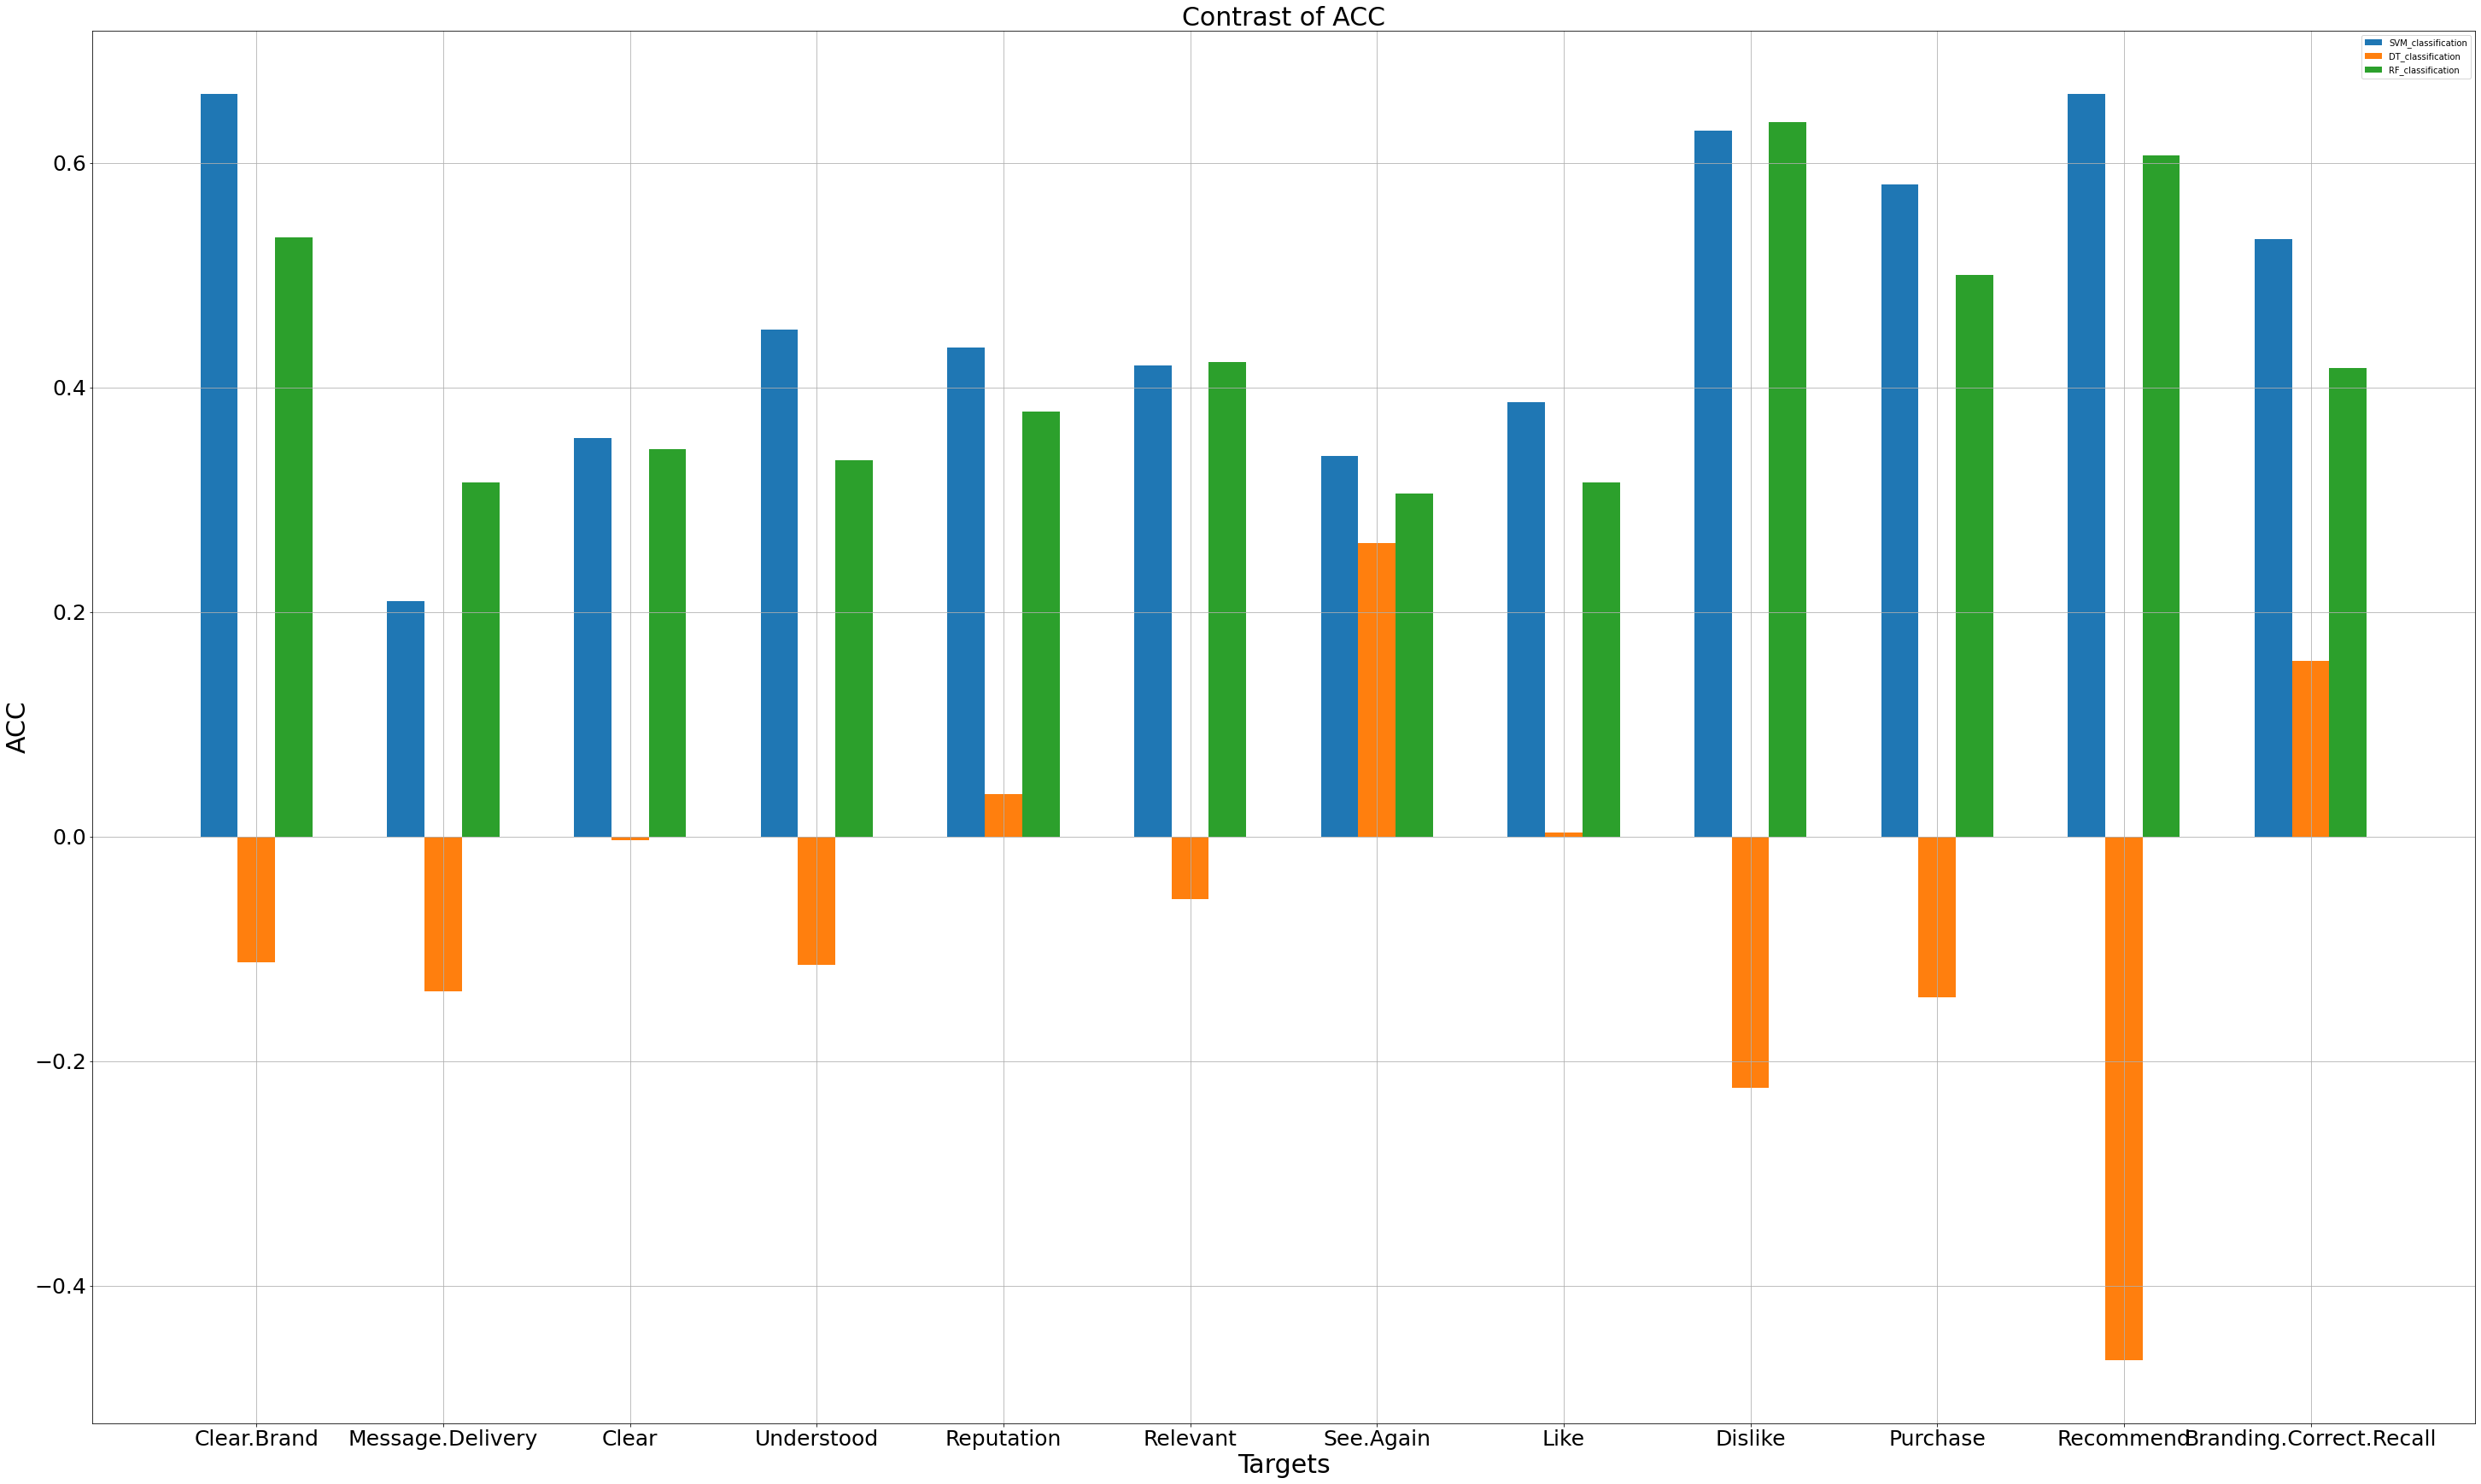

In [37]:
fig = plt.figure(figsize=(50, 30))
plt.bar(x-0.2, y_SVM, label="SVM_classification", width=0.2)
plt.bar(x, y_DT, label="DT_classification", width=0.2)
plt.bar(x+0.2, y_RF, label="RF_classification", width=0.2)

plt.title("Contrast of ACC", fontproperties={"size":30})
plt.xlabel("Targets", fontproperties={"size":30})
plt.ylabel("ACC", fontproperties={"size":30})
plt.xticks(fontsize=25, ticks=x, labels=labels)  # 设置x轴刻度字体大小
plt.yticks(fontsize=25)  # 设置y轴刻度字体大小
plt.grid()
plt.legend()
plt.savefig('./plots/ACC_contrast.png')
plt.show()